In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('Health_insurance_data.csv')

# Initial data inspection

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Sex, smoker, region are object dataype as expected.Charges and BMI are float dataype as expected. We let children attribute as integer datatype for the sake of simplicity of analysis. Otherwise it can be converted into categorical-dummy data as well.

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null value is present in the data.

#Exploratory data analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Univariate Analysis

<ipython-input-13-2f962a770375>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age, kde = True, ax = axs[0])


<Axes: xlabel='age'>

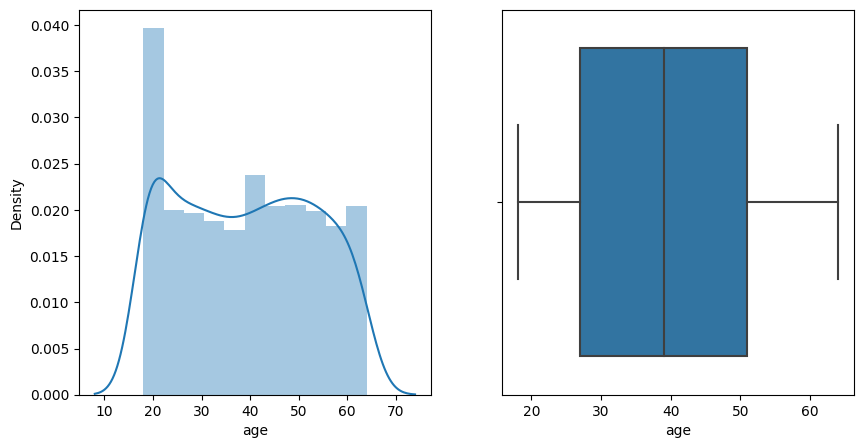

In [ ]:
fig_dims = (10,5)
fig, axs = plt.subplots(nrows =1, ncols = 2, figsize = fig_dims)
sns.distplot(df.age, kde = True, ax = axs[0])
sns.boxplot(x = 'age', data = df, ax = axs[1])

The demography that we are looking at has more no. of young people in the age bracket of 18-30

<ipython-input-10-a5b42633f48f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.charges, kde = True, ax = axs[0])


<Axes: xlabel='charges'>

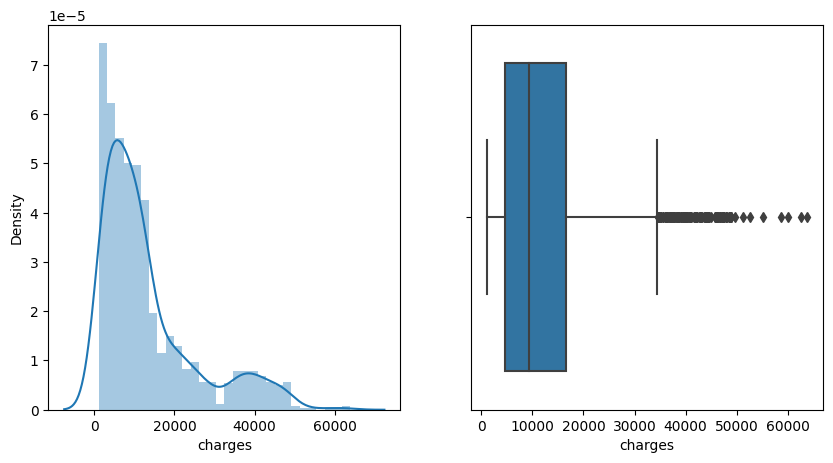

In [ ]:
fig_dims = (10,5)
fig, axs = plt.subplots(nrows =1, ncols = 2, figsize = fig_dims)
sns.distplot(df.charges, kde = True, ax = axs[0])
sns.boxplot(x = 'charges', data = df, ax = axs[1])

More no of people claim lesser insurance charges, whereas lesser no of people claim high insurance charges, It would be interesting to know who are these people. The outliers could be natural outliers as these might be people with prolonged or expensive treatments

<ipython-input-11-0396bc068650>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.bmi, kde = True, ax = axs[0])


<Axes: xlabel='bmi'>

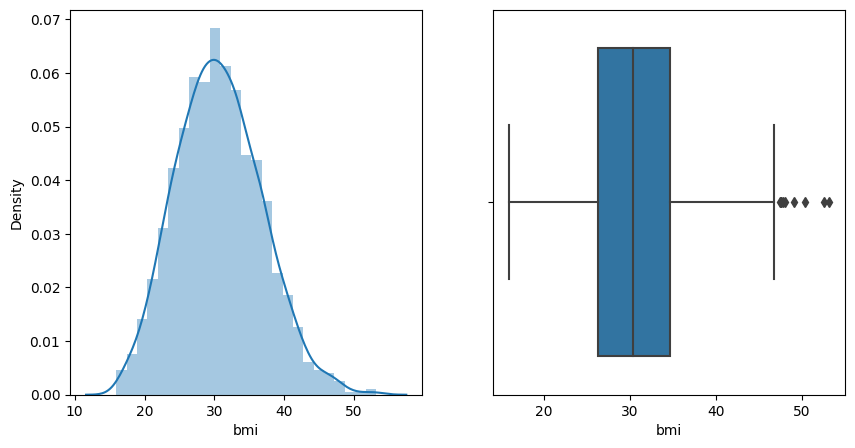

In [ ]:
fig_dims = (10,5)
fig, axs = plt.subplots(nrows =1, ncols = 2, figsize = fig_dims)
sns.distplot(df.bmi, kde = True, ax = axs[0])
sns.boxplot(x = 'bmi', data = df, ax = axs[1])

BMI is distributed normally. However we see most of the people in the population have an unhealthy bmi (more than 25, ideal bmi is 21)) The average bmi here is about 30. The outliers could be natural outliers as these might obese people.

In [ ]:
age_avg_charges = df.groupby(['age'])['charges'].mean()
age_avg_charges

age
18     7086.217556
19     9747.909335
20    10159.697736
21     4730.464330
22    10012.932802
23    12419.820040
24    10648.015962
25     9838.365311
26     6133.825309
27    12184.701721
28     9069.187564
29    10430.158727
30    12719.110358
31    10196.980573
32     9220.300291
33    12351.532987
34    11613.528121
35    11307.182031
36    12204.476138
37    18019.911877
38     8102.733674
39    11778.242945
40    11772.251310
41     9653.745650
42    13061.038669
43    19267.278653
44    15859.396587
45    14830.199856
46    14342.590639
47    17653.999593
48    14632.500445
49    12696.006264
50    15663.003301
51    15682.255867
52    18256.269719
53    16020.930755
54    18758.546475
55    16164.545488
56    15025.515837
57    16447.185250
58    13878.928112
59    18895.869532
60    21979.418507
61    22024.457609
62    19163.856573
63    19884.998461
64    23275.530837
Name: charges, dtype: float64

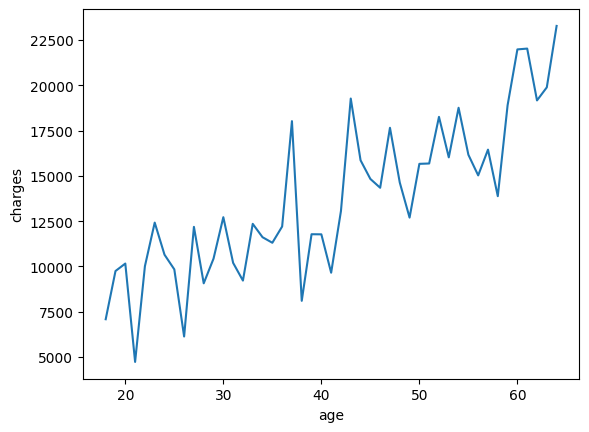

In [ ]:
sns.lineplot( data = age_avg_charges)
plt.show()

As a person ages his /her charges increase, which seems logical

In [ ]:
bmi_avg_charges = df.groupby(['bmi'])['charges'].mean()
bmi_avg_charges

bmi
15.960     1694.796400
16.815     4904.000350
17.195    14455.644050
17.290     7813.353433
17.385     2775.192150
              ...     
48.070     9432.925300
49.060    11381.325400
50.380     2438.055200
52.580    44501.398200
53.130     1163.462700
Name: charges, Length: 548, dtype: float64

<Axes: xlabel='bmi', ylabel='charges'>

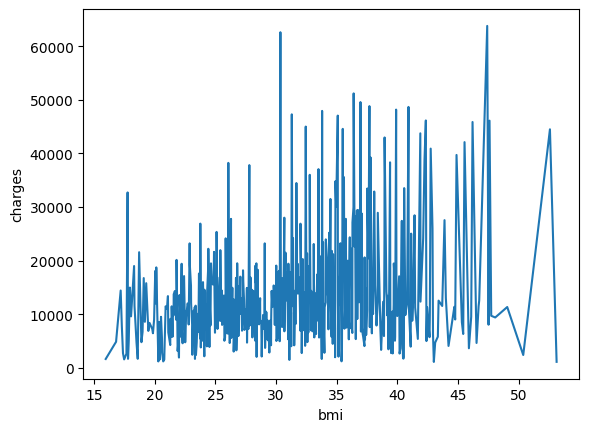

In [ ]:
sns.lineplot(data = bmi_avg_charges)

Thers isn't a sharp linear or any other trend here. However we see some points where the bmi and charges both are on higher side.

## Bivariate Analysis

In [ ]:
df_num = df.select_dtypes(exclude = 'object')
df_num

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [ ]:
df_num.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


No strong correlation observed

In [ ]:
df.groupby(['smoker'])['charges'].count()

smoker
no     1064
yes     274
Name: charges, dtype: int64

There are less smokers compared to non-smokers in the population; 274 vs 1064

<Axes: xlabel='smoker'>

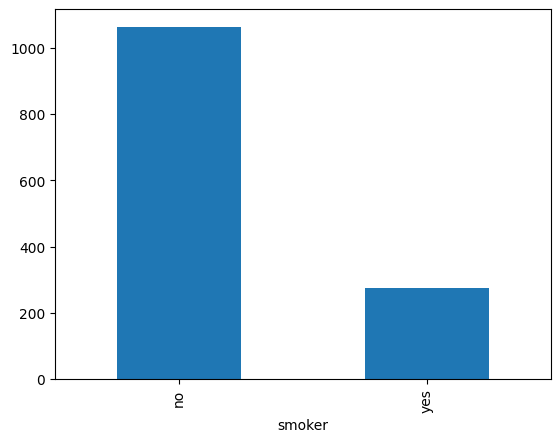

In [ ]:
df.groupby(['smoker'])['charges'].count().plot.bar()

In [ ]:
smokers_avg_charges=df.groupby(['smoker'])['charges'].mean()
smokers_avg_charges

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

<Axes: xlabel='smoker'>

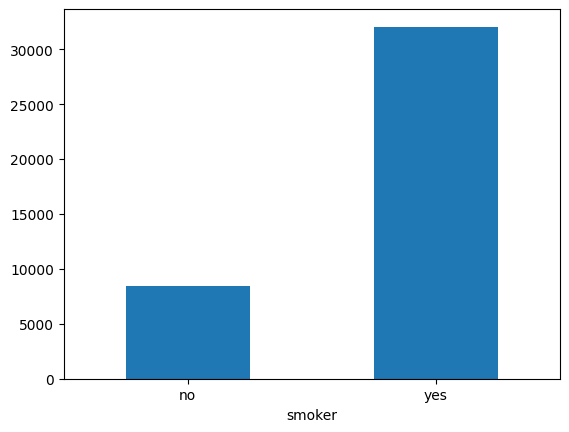

In [ ]:
smokers_avg_charges.plot.bar(rot=0)

Smokers claim more charges than non-smokers on an average basis

As seen earlier, the average charges increase with increase in age.

### Crosstab observation for some categorical vs categorical data attributes

In [ ]:
# For frequency plot between two categorcial, crosstab can be used
sex_smoker_crstb = pd.crosstab(df.sex,df.smoker)

In [ ]:
sex_smoker_crstb

smoker,no,yes
sex,,
female,547,115
male,517,159


<Axes: xlabel='sex'>

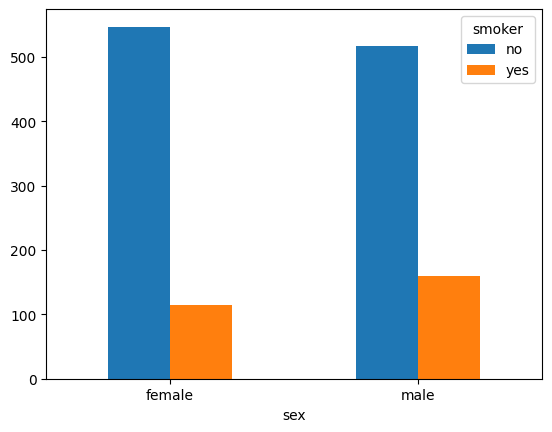

In [ ]:
sex_smoker_crstb.plot.bar(rot=0)

There are more male-smokers than female-smokers

<Axes: xlabel='sex'>

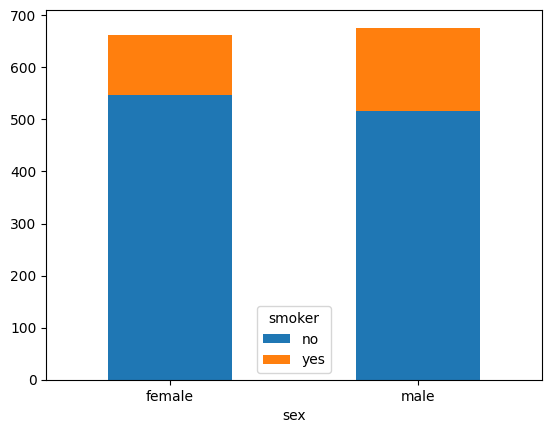

In [ ]:
sex_smoker_crstb.plot.bar(stacked = True, rot=0)

In [ ]:
region_smoker_crstb = pd.crosstab(df.region,df.smoker)

In [ ]:
region_smoker_crstb

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


Southeast region has more no. of smokers than the other regions, even if you find out percentage of smokers in eahc region

<Axes: xlabel='region'>

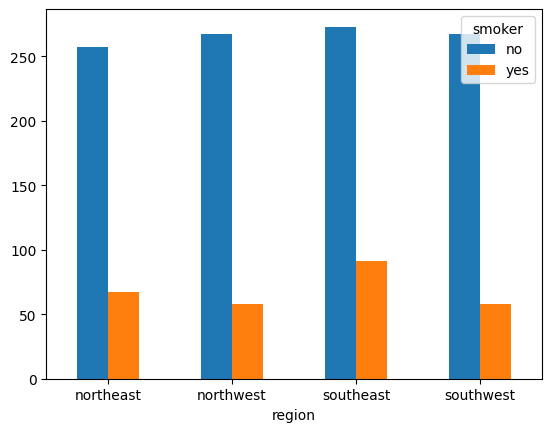

In [ ]:
region_smoker_crstb.plot.bar(rot=0)

## Multivariate analysis

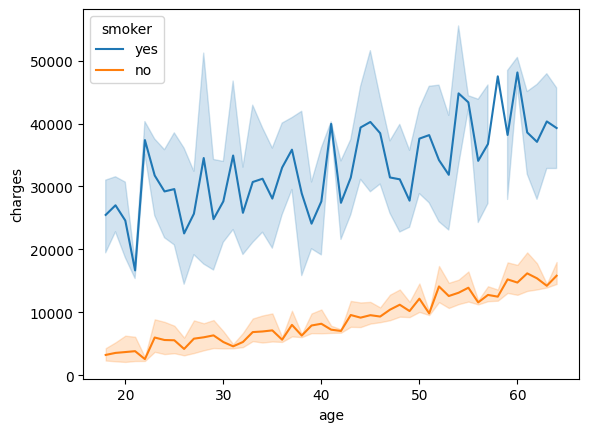

In [ ]:
sns.lineplot(x = 'age', y = 'charges', data = df, hue = 'smoker')
plt.show()

It is clearely evident that smokers claim more charges.

In [ ]:
df.groupby(['age','sex'])['charges'].mean()

age  sex   
18   female     6522.257919
     male       7603.180557
19   female     9611.799484
     male       9876.241479
20   female     7351.917571
                   ...     
62   male      21843.286953
63   female    22345.556404
     male      17200.753432
64   female    23493.178700
     male      23057.882975
Name: charges, Length: 94, dtype: float64

In [ ]:
age_sex_avg_charges = df.groupby(['age','sex'])['charges'].mean().unstack()
age_sex_avg_charges

sex,female,male
age,,
18,6522.257919,7603.180557
19,9611.799484,9876.241479
20,7351.917571,12780.292557
21,5350.394655,4193.191381
22,7635.835562,12073.083743
23,18590.470551,6249.169528
24,6569.819790,14726.212134
25,7993.993028,11436.821289
26,6013.517349,6238.092207


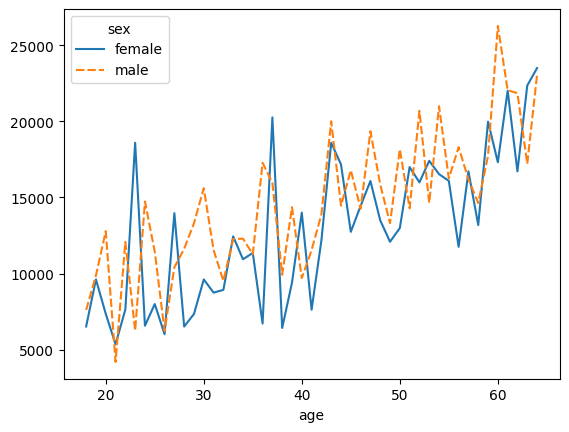

In [ ]:
sns.lineplot(data = age_sex_avg_charges)
plt.show()

There is no clear observation on charges here on the basis of gender or age-agender combined. However age definitely has a positive relation with claims.

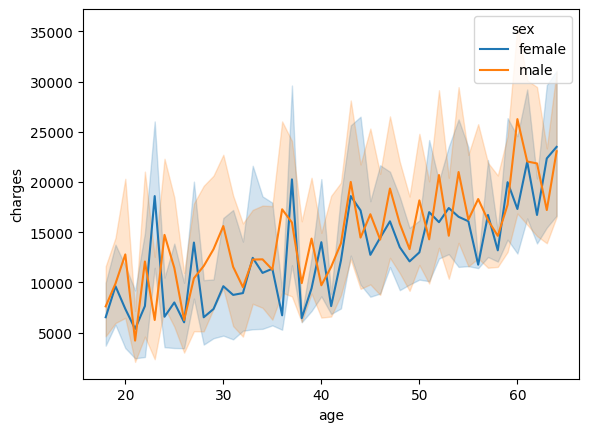

In [ ]:
# Alternative approach
sns.lineplot(x = 'age', y = 'charges', data = df, hue = 'sex')
plt.show()

In [ ]:
df.groupby(['region','smoker'])['charges'].mean()

region     smoker
northeast  no         9165.531672
           yes       29673.536473
northwest  no         8556.463715
           yes       30192.003182
southeast  no         8032.216309
           yes       34844.996824
southwest  no         8019.284513
           yes       32269.063494
Name: charges, dtype: float64

In [ ]:
df.groupby(['region','smoker'])['charges'].mean().unstack()

smoker,no,yes
region,,
northeast,9165.531672,29673.536473
northwest,8556.463715,30192.003182
southeast,8032.216309,34844.996824
southwest,8019.284513,32269.063494


People belonging to the Northeast region definitely claim higher charges on an average basis

<Axes: xlabel='region'>

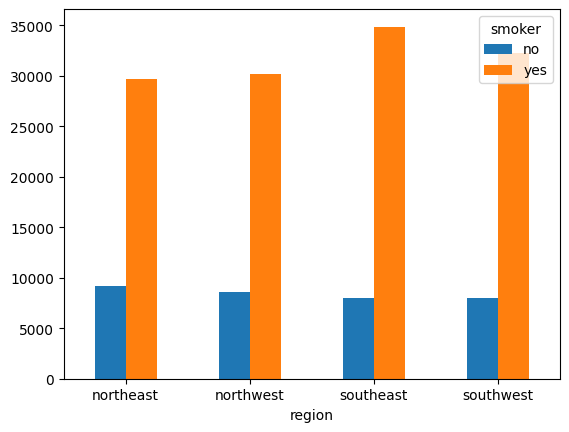

In [ ]:
df.groupby(['region','smoker'])['charges'].mean().unstack().plot.bar(rot = 0)

In [ ]:
# just for illustration purpose.
df.groupby(['region','smoker'], as_index = False)['charges'].mean().rename(columns = {'charges':'avg_charge'})

,region,smoker,avg_charge
0,northeast,no,9165.531672
1,northeast,yes,29673.536473
2,northwest,no,8556.463715
3,northwest,yes,30192.003182
4,southeast,no,8032.216309
5,southeast,yes,34844.996824
6,southwest,no,8019.284513
7,southwest,yes,32269.063494


In [ ]:
#for more detailed chart
df_region_smoker_avg_charge = df.groupby(['region','smoker'], as_index = False)['charges'].mean().rename(columns = {'charges':'avg_charge'})

In [ ]:
df_region_smoker_avg_charge

,region,smoker,avg_charge
0,northeast,no,9165.531672
1,northeast,yes,29673.536473
2,northwest,no,8556.463715
3,northwest,yes,30192.003182
4,southeast,no,8032.216309
5,southeast,yes,34844.996824
6,southwest,no,8019.284513
7,southwest,yes,32269.063494


<Axes: xlabel='region', ylabel='avg_charge'>

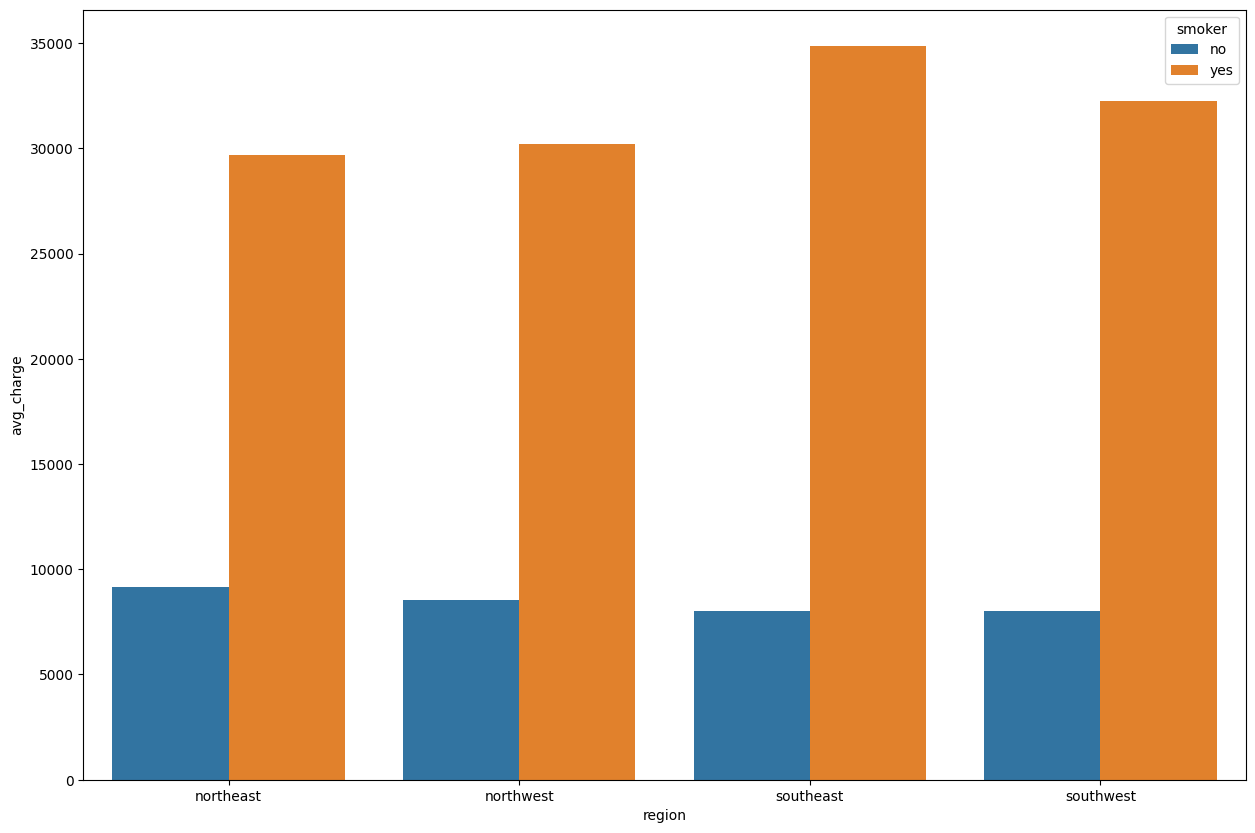

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x = 'region',
            y = 'avg_charge',
            hue = 'smoker',
            data = df_region_smoker_avg_charge)

In [ ]:
children_smoker_avg_charges = df.groupby(['children','smoker'])['charges'].mean().unstack()
children_smoker_avg_charges

smoker,no,yes
children,,
0,7611.793335,31341.363954
1,8303.109350,31822.654334
2,9493.093674,33844.235755
3,9614.519391,32724.915268
4,12121.344408,26532.276933
5,8183.845556,19023.260000


<Axes: xlabel='children'>

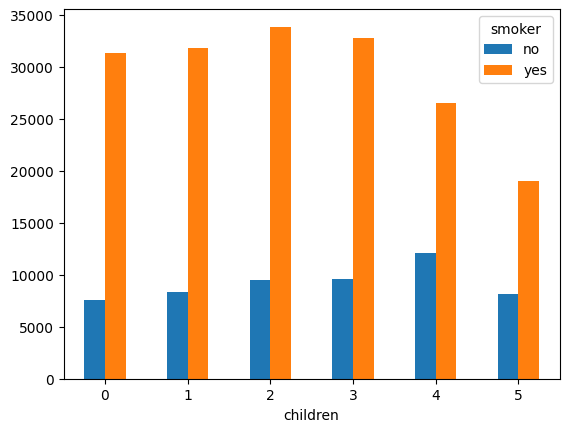

In [ ]:
children_smoker_avg_charges.plot.bar(rot=0)

It seems like the average claims increase with increase in kids a person has. Especially looking at the non-smokers category

## Additional visualisation for reference

In [ ]:
df_region_smoker = df.groupby(['region','smoker'], as_index = False)['charges'].count().rename(columns = {'charges':'count'})

In [ ]:
df_region_smoker

,region,smoker,count
0,northeast,no,257
1,northeast,yes,67
2,northwest,no,267
3,northwest,yes,58
4,southeast,no,273
5,southeast,yes,91
6,southwest,no,267
7,southwest,yes,58


<Axes: xlabel='region', ylabel='count'>

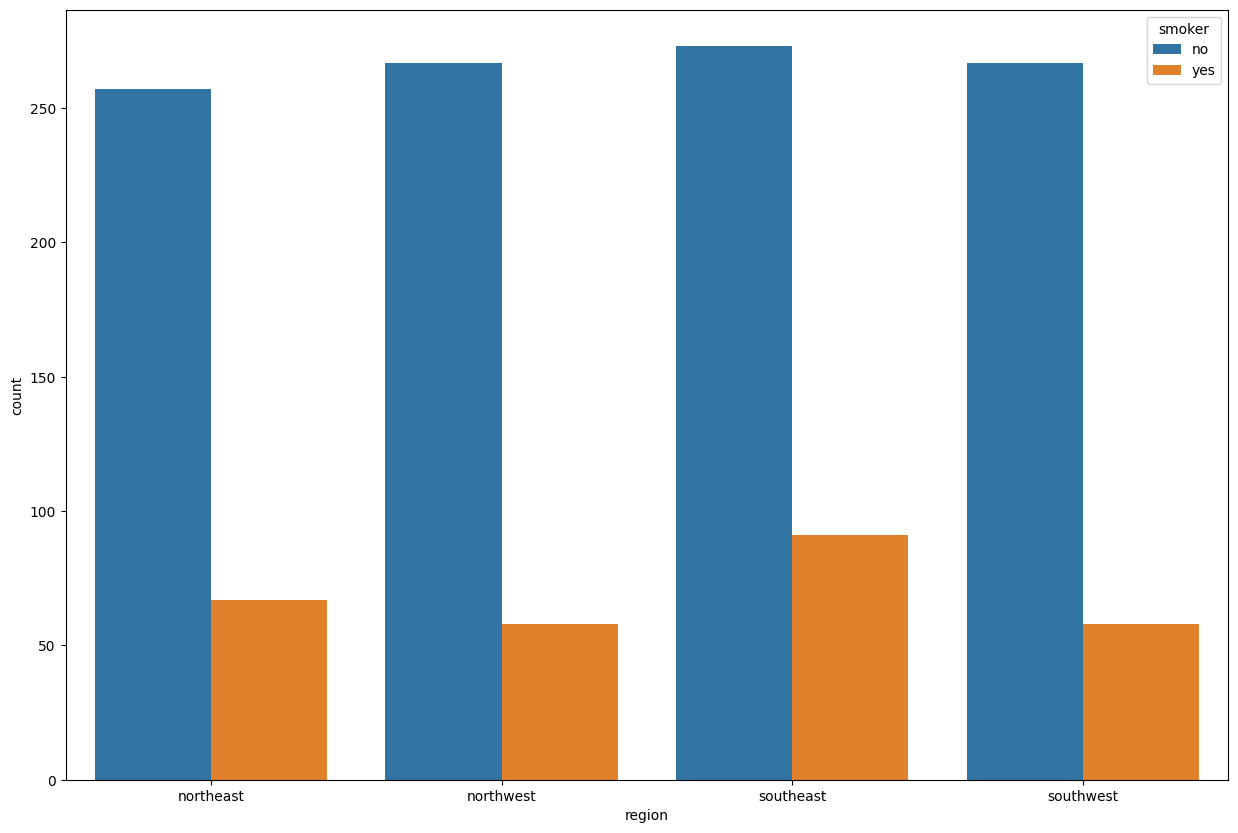

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x = 'region',
            y = 'count',
            hue = 'smoker',
            data = df_region_smoker)

Southeast region also has higher no of smokers compared to other regions

# Data processing for regression

In [ ]:
from sklearn.preprocessing import LabelEncoder
df = pd.get_dummies(df,drop_first = True)

We need to convert all the categorical data points to dummy variables; alos drop one dummy variable of each data-atrribute to avoid multi-collinearity; hence the use of 'drop_first = True'

In [ ]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [ ]:
df.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


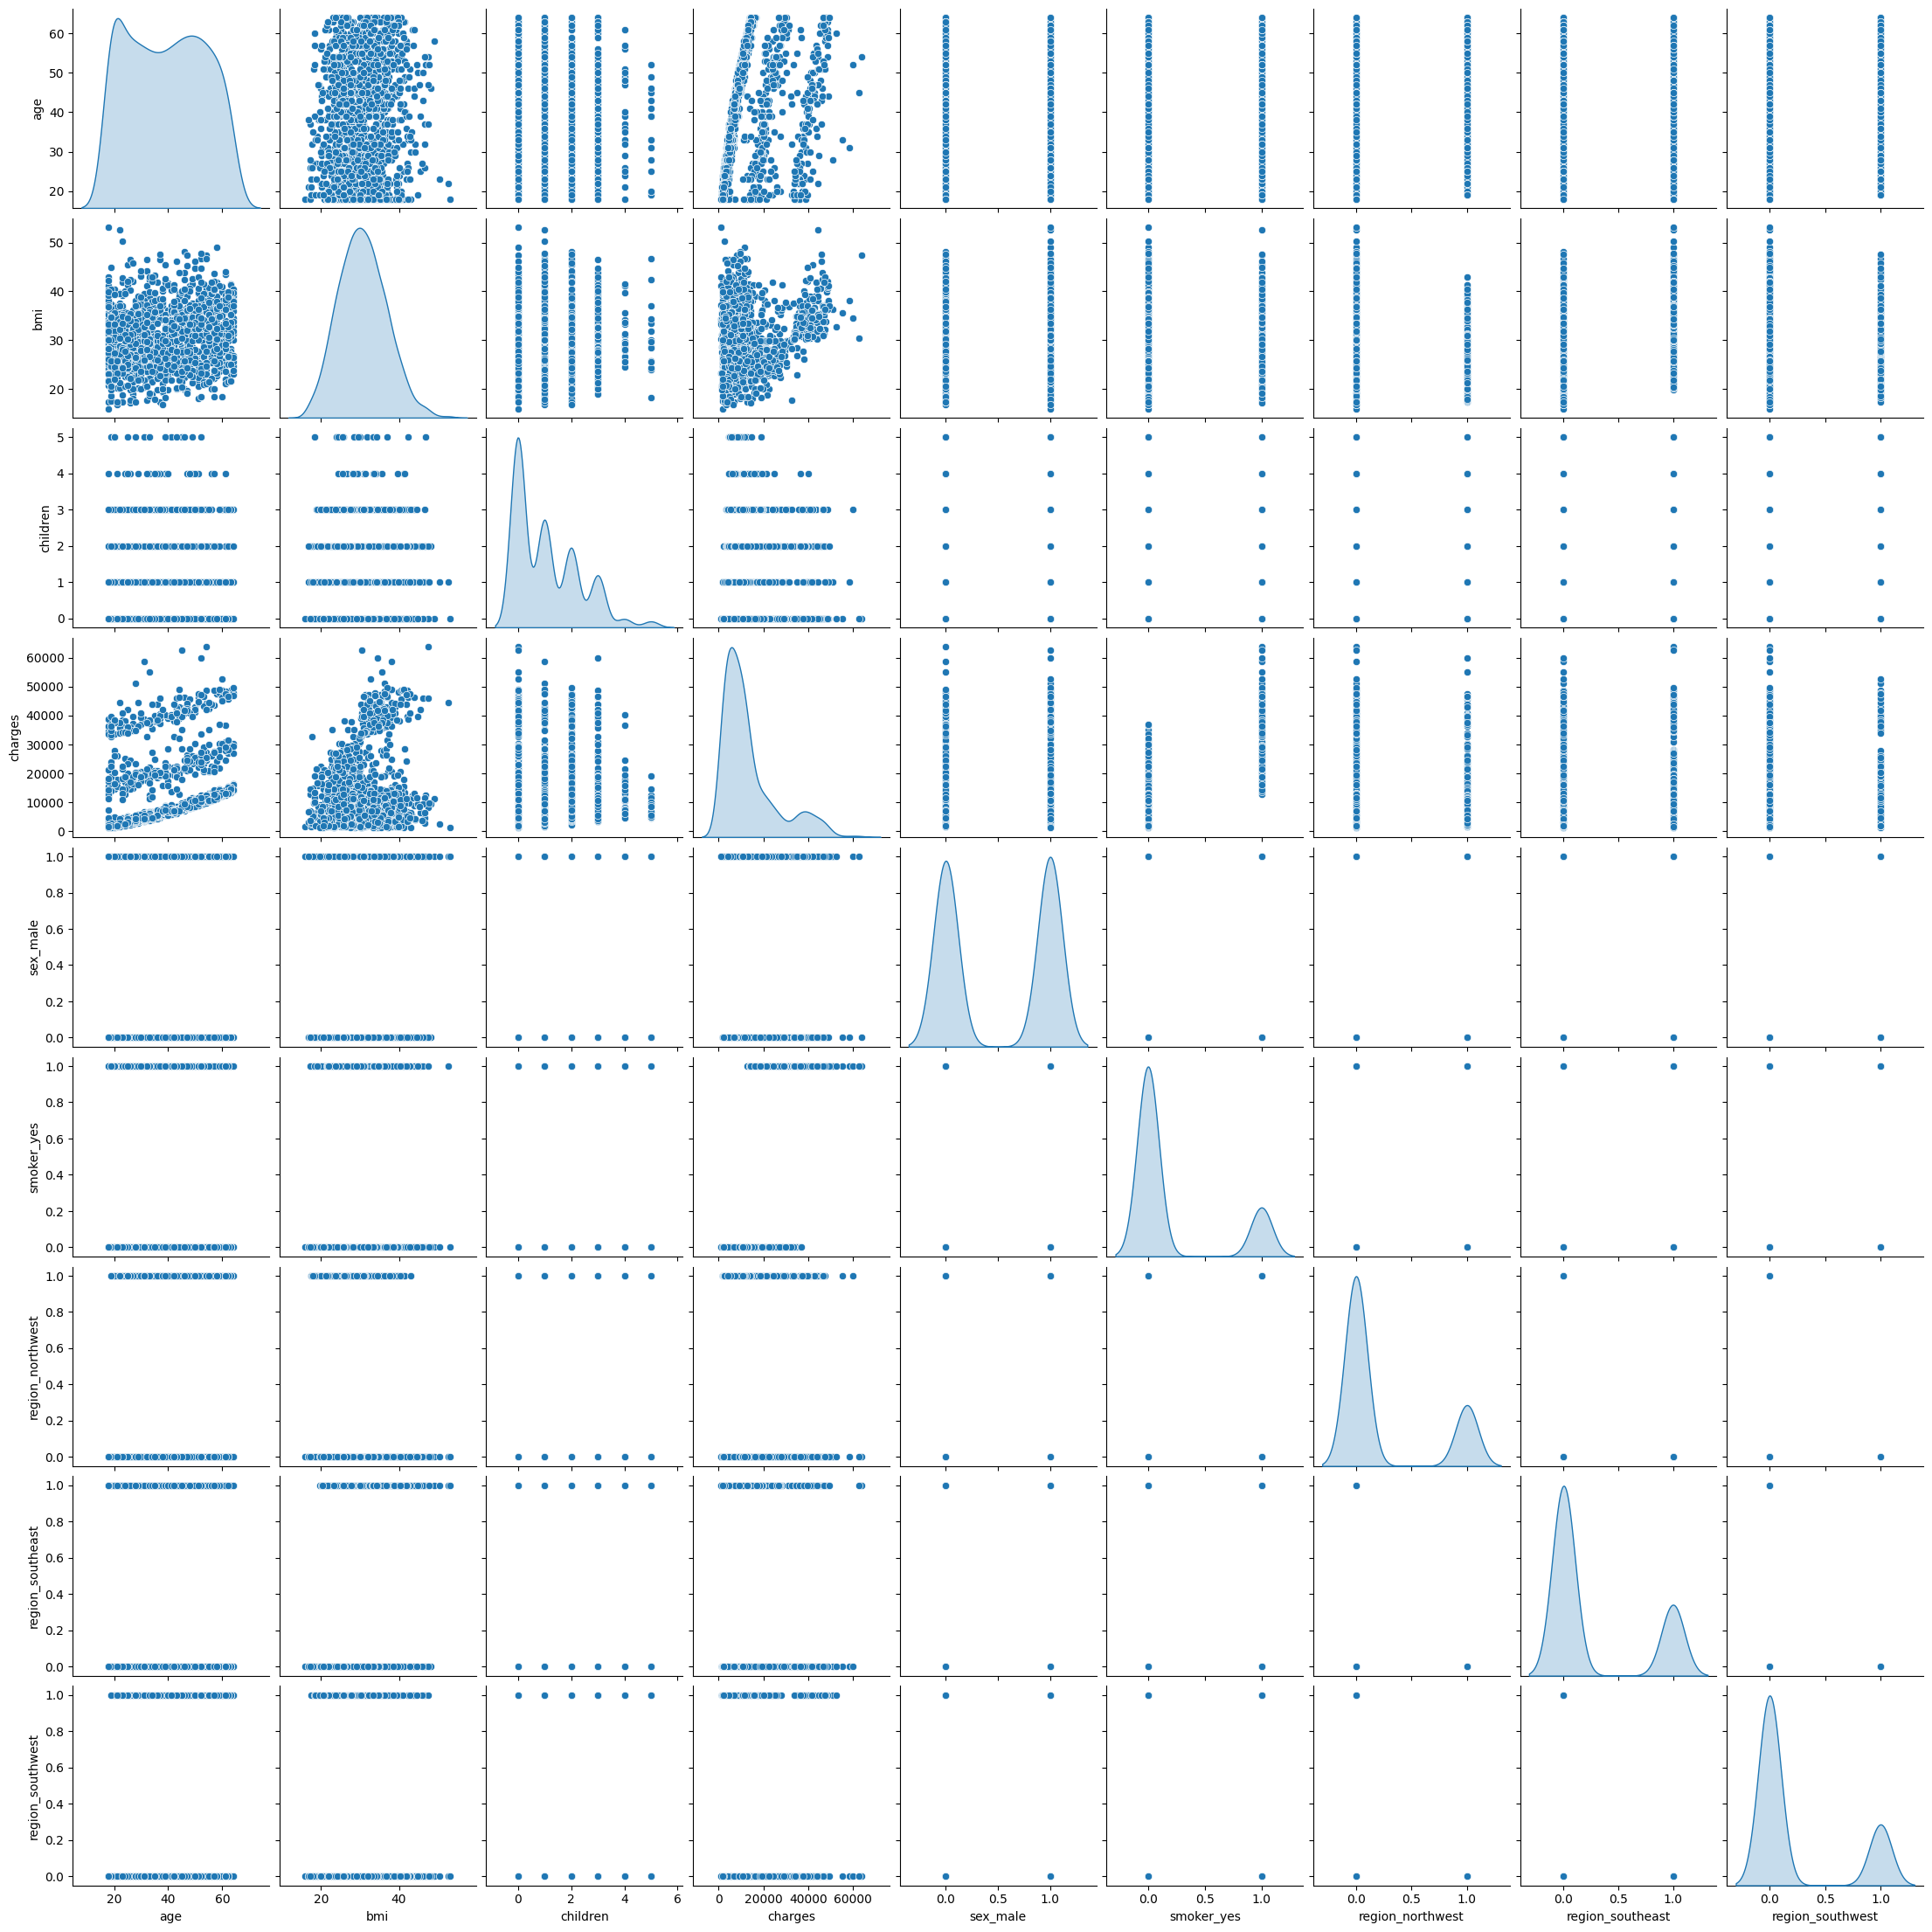

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

Only charges and age show a linear trend, rest are not easily interpretable. If we look at the diagonal part, we see that there two clusters in age and charges, possibly indicating there are two age clusters in the data each having a different claim-range

# Modeling

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
lm = sm.ols(formula= 'charges ~ age+bmi+children+sex_male+smoker_yes+region_northwest+region_southeast+region_southwest', data = df).fit()
lm.params

Intercept          -11938.538576
age                   256.856353
bmi                   339.193454
children              475.500545
sex_male             -131.314359
smoker_yes          23848.534542
region_northwest     -352.963899
region_southeast    -1035.022049
region_southwest     -960.050991
dtype: float64

In [ ]:
print(lm.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:05:07   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.194e+04    987.819  

R-squared value is in acceptable range and Anova values also validate the results.
We observe that sex_male is not a significant varible, also region_northwest is not significant. Age, bmi, children, smoker_yeas are significant and have positve coeeficients, whereas region_southeast and region_southwest are significant and have negative coefficients (this has to read as these 2 regions will claim lesser charges w.r.t northeast region which was dropped).

Note: It was expected that regions "southeast and southwest to have more charges, however that was when we looked at smokers in those regions, so for observing combined effect we will combining these variables differently for regression later on in this exercise

In [ ]:
# Dropping insignificant variables (not dropping sex_male as it is important from domain (demographic study) purpose)
lm_2 = sm.ols(formula= 'charges ~ age+bmi+children+sex_male+smoker_yes+region_southeast+region_southwest', data = df).fit()
lm_2.params

Intercept          -12114.441369
age                   256.890150
bmi                   339.165964
children              472.464259
sex_male             -130.287441
smoker_yes          23856.029981
region_southeast     -858.738992
region_southwest     -783.027236
dtype: float64

In [ ]:
print(lm_2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     572.5
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:05:12   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.211e+04    958.716  

No change in R-squared or adjusted R-squared after dropping insignificant variables. Lets drop the region_southwest variable as it turned out less significant.

In [ ]:
lm_3 = sm.ols(formula= 'charges ~ age+bmi+children+sex_male+smoker_yes+region_southeast', data = df).fit()
lm_3.params

Intercept          -12225.123998
age                   257.021320
bmi                   333.963144
children              468.977915
sex_male             -129.191069
smoker_yes          23866.029123
region_southeast     -579.029183
dtype: float64

In [ ]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     666.0
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:05:33   Log-Likelihood:                -13550.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.223e+04    957.856  

This is seemingly an opitimised model with only significant pair of variables in the model retained, however combined effect of regions and smoking behavior is yet to be observed

In [ ]:
# Combining the effect of smoking habbit and region by creating three more dummy-variables as below:
df['smoker_northwest'] = df['smoker_yes']*df['region_northwest']
df['smoker_southeast'] = df['smoker_yes']*df['region_southeast']
df['smoker_southwest'] = df['smoker_yes']*df['region_southwest']
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,smoker_northwest,smoker_southeast,smoker_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0,0,0,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0,0,0
3,33,22.705,0,21984.47061,1,0,1,0,0,0,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0,0,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0,0,0,0
1336,21,25.800,0,2007.94500,0,0,0,0,1,0,0,0


In [ ]:
lm_4 = sm.ols(formula= 'charges ~ age+bmi+children+sex_male+smoker_yes+region_northwest+region_southeast+region_southwest+smoker_northwest+smoker_southeast+smoker_southwest', data = df).fit()
lm_4.params

Intercept          -11294.291722
age                   256.337131
bmi                   337.715672
children              489.169515
sex_male             -190.966603
smoker_yes          21116.115381
region_northwest     -508.560835
region_southeast    -2308.788760
region_southwest    -1751.278038
smoker_northwest      427.809955
smoker_southeast     5595.056537
smoker_southwest     4004.377399
dtype: float64

In [ ]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     376.5
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:07:45   Log-Likelihood:                -13530.
No. Observations:                1338   AIC:                         2.708e+04
Df Residuals:                    1326   BIC:                         2.715e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.129e+04    990.331  

This time it is seen that region alone has a negative coefficient, whereas when region an smoker variables are combined into one, the coeeficients turn into highly positive value. This indicates that smokers belonging to southeast and southwest region claim higher charegs w.r.t. norhteast region which was dropped. northwest region will still need to be dropped. We also see a rise in adjusted R-squared value, indicating that the analysis and choice of variables is in correct direction.

In [ ]:
# Lets retain only the significant variables and do the regression
lm_5 = sm.ols(formula= 'charges ~ age+bmi+children+sex_male+smoker_yes+region_southeast+region_southwest+smoker_southeast+smoker_southwest', data = df).fit()
lm_5.params

Intercept          -11557.119860
age                   256.423515
bmi                   337.848440
children              486.311448
sex_male             -191.970375
smoker_yes          21338.130802
region_southeast    -2050.202291
region_southwest    -1492.275853
smoker_southeast     5372.920790
smoker_southwest     3783.042424
dtype: float64

In [ ]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     460.4
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:08:07   Log-Likelihood:                -13530.
No. Observations:                1338   AIC:                         2.708e+04
Df Residuals:                    1328   BIC:                         2.713e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.156e+04    951.782  

Adjusted R-squared again increased, indicating that dropping insgnificant variables is useful for the analysis. lm_5 is the most optimised model so far and the significant variables are age, bmi, children, smoker_yes, region_southeast, region_southwest, smoker_southeast, smoker_southwest

### Modeling using test-train samples of the data to have a robust model for real world application

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_train, data_test = train_test_split(df,test_size = 0.10, random_state = 22, shuffle =True)

In [ ]:
data_train.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest',
       'smoker_northwest', 'smoker_southeast', 'smoker_southwest'],
      dtype='object')

In [ ]:
data_train

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,smoker_northwest,smoker_southeast,smoker_southwest
1057,45,31.790,0,17929.30337,0,0,0,1,0,0,0,0
119,37,23.370,2,6686.43130,0,0,1,0,0,0,0,0
207,35,27.740,2,20984.09360,1,1,0,0,0,0,0,0
130,59,26.505,0,12815.44495,0,0,0,0,0,0,0,0
1151,58,36.480,0,12235.83920,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
356,46,43.890,3,8944.11510,1,0,0,1,0,0,0,0
960,19,39.615,1,2730.10785,0,0,1,0,0,0,0,0
812,54,21.010,2,11013.71190,1,0,0,1,0,0,0,0
132,53,35.900,2,11163.56800,0,0,0,0,1,0,0,0


In [ ]:
data_test

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,smoker_northwest,smoker_southeast,smoker_southwest
1231,20,21.80,0,20167.33603,0,1,0,0,1,0,0,1
768,64,39.70,0,14319.03100,0,0,0,0,1,0,0,0
847,23,50.38,1,2438.05520,1,0,0,1,0,0,0,0
510,56,32.11,1,11763.00090,1,0,0,0,0,0,0,0
363,21,26.40,1,2597.77900,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
475,61,28.31,1,28868.66390,1,1,1,0,0,1,0,0
398,64,25.60,2,14988.43200,1,0,0,0,1,0,0,0
181,18,38.28,0,1631.82120,0,0,0,1,0,0,0,0
217,27,23.10,0,2483.73600,1,0,0,1,0,0,0,0


In [ ]:
# X = sm.add_constant(x_train)
lm1 = sm.ols(formula= 'charges ~ age+bmi+children+sex_male+smoker_yes+region_northwest+region_southeast+region_southwest', data = data_train).fit()
lm1.params

Intercept          -11732.596119
age                   259.387671
bmi                   330.394307
children              426.721303
sex_male             -126.176084
smoker_yes          23624.897228
region_northwest     -391.565769
region_southeast     -887.159519
region_southwest     -898.246774
dtype: float64

In [ ]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     439.9
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:28:52   Log-Likelihood:                -12197.
No. Observations:                1204   AIC:                         2.441e+04
Df Residuals:                    1195   BIC:                         2.446e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.173e+04   1043.467  

In [ ]:
lm2 = sm.ols(formula= 'charges ~ age+bmi+children+sex_male+smoker_yes+region_southeast', data = data_train).fit()
lm2.params

Intercept          -12013.181003
age                   259.370376
bmi                   325.673982
children              416.060099
sex_male             -124.209761
smoker_yes          23636.341528
region_southeast     -440.883884
dtype: float64

In [ ]:
print(lm2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     585.5
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:29:06   Log-Likelihood:                -12199.
No. Observations:                1204   AIC:                         2.441e+04
Df Residuals:                    1197   BIC:                         2.445e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.201e+04   1013.262  

In [ ]:
ypred_train = lm2.predict(data_train)
ypred_train

1057     9570.777930
119      6026.644075
207     30443.230389
130     11921.660091
1151    14910.887682
            ...     
356     14894.774021
960      6232.491033
812      9102.256232
132     14257.265088
885     29195.727315
Length: 1204, dtype: float64

In [ ]:
ypred_test = lm2.predict(data_test)
ypred_test

1231    23910.260855
768     17515.780161
847     10210.759307
510     13260.801967
363      2447.450118
            ...     
475     36956.434247
398     13631.687456
181      4681.401908
217      1947.794493
5        3969.265071
Length: 134, dtype: float64

In [ ]:
lm3 = sm.ols(formula= 'charges ~ age + bmi + children + sex_male + smoker_yes + region_northwest + region_southeast + region_southwest + smoker_northwest + smoker_southeast + smoker_southwest ', data = data_train).fit()
lm3.params

Intercept          -11002.665981
age                   258.972330
bmi                   327.223074
children              437.413096
sex_male             -197.971929
smoker_yes          20693.065770
region_northwest     -588.445610
region_southeast    -2252.660218
region_southwest    -1688.607344
smoker_northwest      684.734666
smoker_southeast     5977.860424
smoker_southwest     4010.157798
dtype: float64

In [ ]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     331.5
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:29:33   Log-Likelihood:                -12180.
No. Observations:                1204   AIC:                         2.438e+04
Df Residuals:                    1192   BIC:                         2.444e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -1.1e+04   1045.510    -10.524      0.000   -1.31e+04   -8951.421
age                258.9723     12.532     20.664      0.000     234.384     283.560
bmi                327.2231     30.004     10.906      0.000     268.356     386.090
children           437.4131    142.811      3.063      0.002     157.224     717.602
sex_male          -197.9719    349.153     -0.567      0.571    -882.996     487.052
smoker_yes        2.069e+04    878.703     23.550      0.000     1.9e+04    2.24e+04
region_northwest  -588.4456    552.509     -1.065      0.287   -1672.445     495.554
region_southeast -2252.6602    567.068     -3.972      0.000   -3365.223   -1140.098
region_southwest -1688.6073    557.757     -3.027      0.003   -2782.902    -594.312
smoker_northwest   684.7347   1266.362      0.541      0.589   -1799.812    3169.281
smoker_southeast  5977.8604   1162.365      5.143      0.000    3697.352    8258.369
smoker_southwest  4010.1578   1269.551      3.159      0.002    1519.355    6500.960
==============================================================================
Omnibus:                      282.670   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              693.864
Skew:                           1.249   Prob(JB):                    2.13e-151
Kurtosis:                       5.754   Cond. No.                         580.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
ypred_train = lm3.predict(data_train)
ypred_train

1057     8800.850148
119      6512.894031
207     28508.453654
130     12949.749036
1151    15366.381257
            ...     
356     14133.489029
960      6729.717832
812      8280.990644
132     13656.394684
885     31408.719233
Length: 1204, dtype: float64

In [ ]:
ypred_test = lm3.predict(data_test)
ypred_test

1231    24324.859842
768     16873.711798
847      9425.977002
510     14246.358542
363      1823.247839
            ...     
475     35087.127337
398     12936.720723
181      3932.274995
217      1097.807775
5        3195.537937
Length: 134, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

Train-dataset

In [ ]:
mean_squared_error(data_train['charges'], ypred_train, squared=False)

5986.051392526022

In [ ]:
data_train['charges'].mean()

13252.630901303155

In [ ]:
Coefficient_of_variation_train = mean_squared_error(data_train['charges'], ypred_train, squared=False)/data_train['charges'].mean()
Coefficient_of_variation_train

0.45168777709921754

Test-dataset

In [ ]:
mean_squared_error(data_test['charges'], ypred_test, squared=False)

5798.027468289112

In [ ]:
data_test['charges'].mean()

13430.278996940298

In [ ]:
Coefficient_of_variation_test = mean_squared_error(data_test['charges'], ypred_test, squared=False)/data_test['charges'].mean()
Coefficient_of_variation_test

0.43171310660113804

Test dataset has lesser RMSE and coefficient of variation and lies in the close range of training-model, indicating that we are not overfitting the model.

In [ ]:
# dropping sex_male variable
lm4 = sm.ols(formula= 'charges ~ age + bmi + children + smoker_yes + region_southeast + region_southwest + smoker_southeast + smoker_southwest ', data = data_train).fit()
lm4.params

Intercept          -11382.767297
age                   259.203844
bmi                   326.408569
children              432.866402
smoker_yes          21032.087923
region_southeast    -1943.756923
region_southwest    -1380.496866
smoker_southeast     5612.331101
smoker_southwest     3634.999869
dtype: float64

In [ ]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     456.2
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:14:14   Log-Likelihood:                -12181.
No. Observations:                1204   AIC:                         2.438e+04
Df Residuals:                    1195   BIC:                         2.442e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.138e+04    996.939    -11.418      0.000   -1.33e+04   -9426.823
age                259.2038     12.518     20.706      0.000     234.643     283.764
bmi                326.4086     29.941     10.902      0.000     267.666     385.151
children           432.8664    142.572      3.036      0.002     153.147     712.586
smoker_yes        2.103e+04    631.866     33.286      0.000    1.98e+04    2.23e+04
region_southeast -1943.7569    490.553     -3.962      0.000   -2906.198    -981.316
region_southwest -1380.4969    479.645     -2.878      0.004   -2321.538    -439.456
smoker_southeast  5612.3311    989.293      5.673      0.000    3671.387    7553.275
smoker_southwest  3634.9999   1112.593      3.267      0.001    1452.146    5817.853
==============================================================================
Omnibus:                      282.774   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              692.645
Skew:                           1.251   Prob(JB):                    3.93e-151
Kurtosis:                       5.747   Cond. No.                         401.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
ypred_train_4 = lm4.predict(data_train)
ypred_train_4

1057     8714.177179
119      6701.676001
207     28641.761682
130     12561.718633
1151    15558.440265
            ...     
356     14221.523915
960      6905.647608
812      8394.060206
132     13558.340012
885     31488.284122
Length: 1204, dtype: float64

In [ ]:
ypred_test_4 = lm4.predict(data_test)
ypred_test_4

1231    24203.607317
768     16784.202057
847      9512.494308
510     14046.493532
363      1730.069190
            ...     
475     35134.248113
398     13047.574037
181      3834.064999
217      1212.017518
5        3110.551517
Length: 134, dtype: float64

In [ ]:
Coefficient_of_variation_train_4 = mean_squared_error(data_train['charges'], ypred_train_4, squared=False)/data_train['charges'].mean()
Coefficient_of_variation_train_4

0.4519676024125825

In [ ]:
Coefficient_of_variation_test_4 = mean_squared_error(data_test['charges'], ypred_test_4, squared=False)/data_test['charges'].mean()
Coefficient_of_variation_test_4

0.42854210515187174

Test dataset has lesser RMSE and coefficient of variation and lies in the close range of training-model, indicating that we are not overfitting the model.

In [ ]:
# Homework: Try regression analysis using sklearn library
x = df.drop('charges', axis =1)
y = df['charges']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=22)